Класстеризация k-means

In [542]:
from sklearn.cluster import KMeans

In [543]:
model = KMeans(n_clusters=3, random_state=100)

Функции для учебного дата сета

In [544]:
import numpy as np

In [545]:
import pandas as pd

In [546]:
import matplotlib.pyplot as plt

Функции для создания учебного дата сета (признаки рыб, обитающих в озере)

In [547]:
def make_data (n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                           [6, 9],
                           [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                     columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [548]:
train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'Train')

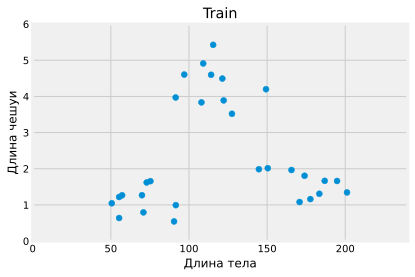

In [549]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

Нормализация данных


In [550]:
from sklearn.preprocessing import MinMaxScaler

In [551]:
scaler = MinMaxScaler()

In [552]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = ['x', 'y'])

Text(0.5, 1.0, 'Train')

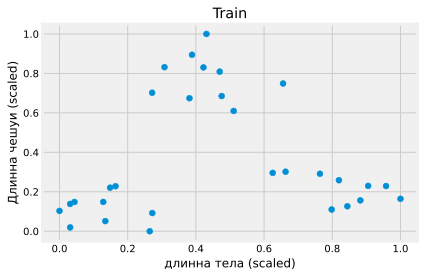

In [553]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('длинна тела (scaled)')
plt.ylabel('Длинна чешуи (scaled)')
plt.title('Train')

Построение модели класстеризации

In [554]:
train_labels = model.fit_predict(train_scaled)

In [555]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

Центры класстеров

In [556]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [557]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'Train')

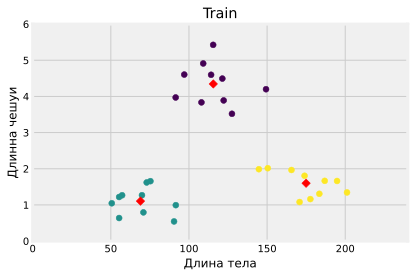

In [558]:
plt.scatter(train['x'], train['y'], c = train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длинна чешуи')
plt.title('Train')

Ineria
---- Величина, показывающая, насколько далеко в среднем расположены точки от центров своих класстеров.
(сумма квадратов от объектов до центров их кластеров)
Чем меньше она, тем лучше разбиение на кластеры, но нужно соблюдать баланс между ее значением и количеством кластеров

In [559]:
model.inertia_

0.5417377477488049

In [560]:
inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

2.9002641632095463
0.5417377477488049
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.2072579445597765
0.16774172223409062
0.1467127247607685


Text(0.5, 1.0, 'Ineria')

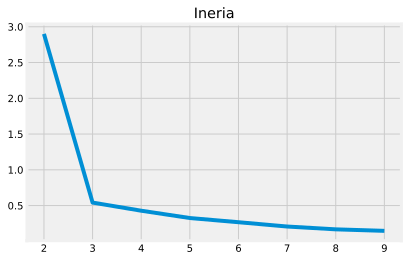

In [561]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Ineria')

Отнесение примеров из тестового дата сета к определенному кластеру

In [562]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [563]:
test_labels = model.predict(test_scaled)

In [564]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Test')

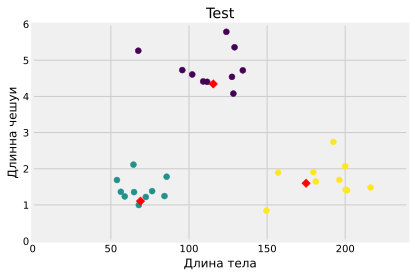

In [565]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker ='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длинна чешуи')
plt.title('Test')

Agglomerative Clustering

Агломеративные алгоритмы - алгоритмы иерархического подхода, основанные на обьединении мелких кластеров в более крупные.
Вначале каждый объект считается отдельным кластером.
Другие алгоритмы иерархического подхода - дивизивные используют обратный порядок, когда сначала вся выборка считается одним кластером, и затем этот кластер делится на части

In [566]:
from sklearn.cluster import AgglomerativeClustering

In [567]:
model = AgglomerativeClustering(n_clusters=3)

In [568]:
train_lables = model.fit_predict(train_scaled)

In [569]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Train')

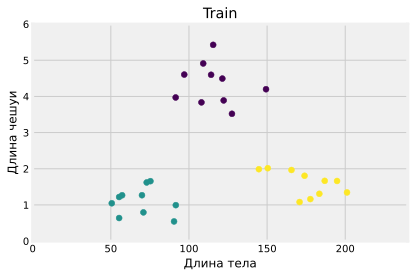

In [570]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [571]:
from sklearn.neighbors import KNeighborsClassifier

In [572]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [573]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [574]:
test_labels = knn.predict(test_scaled)

In [575]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Train')

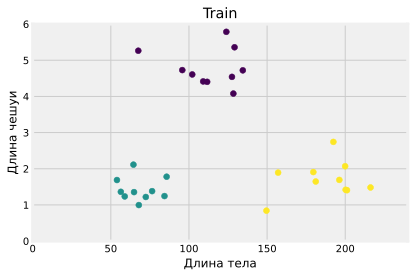

In [576]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [577]:
import numpy as np

In [578]:
import pandas as pd

In [579]:
import matplotlib.pyplot as plt

In [580]:
plt.style.use('fivethirtyeight')

In [581]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

PCA
Principal Componement Analysis (Метод главных компонентов)

In [582]:
# столбец 0 = количество комнат
# столбец 1 - площадь дома в тыс кв м
houses = np.array([[5, 1.6],
                  [4, 1.4],
                  [6, 1.9],
                  [3, 1.1],
                  [4, 1.25]])

Text(0.5, 1.0, 'Test')

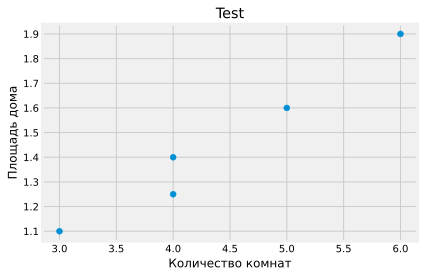

In [583]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')
plt.title('Test')

Алгоритм PCA

In [584]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

Найдем среднее значение каждого признака

In [585]:
mean_values = np.mean(houses, axis=0)

In [586]:
mean_values

array([4.4 , 1.45])

Отнимем от значений признаков среднее значения

In [587]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Найдем матрицу ковариаций.
матрица ковариаций - матрица состоящая из попарных ковариаций признаков.

In [588]:
covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [589]:
# Проверка правильности найденной матрицы- найдем дисперсии центрированных признаков
# они должны совпадать по значению с главной диаганалью ковариационной матрицы
print(np.var(houses_centered[:, 0], ddof=1))
print(np.var(houses_centered[:, 1], ddof=1))

1.3
0.09749999999999998


Найдем собственные значение (eigenvalues) и собственные векторы (eigenvectors) матрицы ковариаций

In [590]:
eigenvalues, eigenvectors =  np.linalg.eig(covarience_matrix)

In [591]:
eigenvalues

array([1.39445221, 0.00304779])

In [592]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Собственные значения сильно отличаются - eigenvalues(0) намного больше чем eigenvalues (1)
поэтому оставим только собственный вектор из столбца 0 массива eigenvectors
Умножим центрированные данные на этот вектор.

In [593]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

Сравнение с результатом вычислений в библиотеке sklearn

In [594]:
from sklearn.decomposition import PCA

In [595]:
pca = PCA(n_components=1)

In [596]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [597]:
pca.explained_variance_ratio_

array([0.99781911])

Применение PCA в моделях машинного обучения

Загрузим сохраненные нами данные по пассажирам Титаника

In [598]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [599]:
x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [600]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [601]:
from sklearn.preprocessing import StandardScaler

In [602]:
scaler = StandardScaler(with_mean=False)

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_train.columns)


In [603]:
pca = PCA(random_state = 100)

In [604]:
pca.fit(x_train_scaled)

PCA(random_state=100)

In [605]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 2.90082626e-32, 2.48283159e-32])

In [606]:
np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406761

Оставим только 7 главных компонент 

In [607]:
pca = PCA(n_components = 7, random_state=100)

In [608]:
x_train_mc = pca.fit_transform(x_train_scaled)

In [609]:
x_valid_mc = pca.transform(x_valid_scaled)

Построим модель логистической регрессии

In [610]:
from sklearn.linear_model import LogisticRegression

In [611]:
lr = LogisticRegression()

In [612]:
lr.fit(x_train_mc, y_train)

LogisticRegression()

In [613]:
y_pred = lr.predict(x_valid_mc)

In [614]:
from sklearn.metrics import accuracy_score

In [615]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineDackend.figure_format = 'svg'
%matplotlib inline

T-SNE


In [617]:
from sklearn.manifold import TSNE

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


Загрузим данные о недвижимости

In [618]:
from sklearn.datasets import load_boston

In [619]:
boston = load_boston()

In [620]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [621]:
data = boston.data

In [622]:
feature_names = boston.feature_names

In [623]:
x = pd.DataFrame(data, columns=feature_names)

In [624]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [625]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [626]:
price = boston.target

In [627]:
x_train, x_test, y_train, y_test, = train_test_split(x, price, test_size=0.3, random_state = 7)

In [628]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков

In [629]:
from sklearn.preprocessing import StandardScaler

In [630]:
scaler = StandardScaler()

In [631]:
x_train_scaled = scaler.fit_transform(x_train)

In [632]:
x_test_scaled = scaler.transform(x_test)

In [633]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)

In [634]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

Применеие TSNE

In [635]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [636]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

In [637]:
x_train_tsne

array([[ 26.869205  ,  -8.81917   ],
       [ 10.168224  ,  -3.6549602 ],
       [ 36.45279   , -13.719215  ],
       [ 37.46264   , -12.690545  ],
       [ 24.143944  , -12.866518  ],
       [ -3.6683934 , -10.133095  ],
       [ -4.0764155 , -12.5878    ],
       [-12.589147  ,   6.9489865 ],
       [-13.031749  ,  16.246     ],
       [ 28.17853   , -18.435862  ],
       [-10.659762  ,  12.729528  ],
       [ 24.675234  ,  -8.931879  ],
       [ -3.399029  ,   5.1438437 ],
       [-10.666058  ,  17.900982  ],
       [ 36.753525  , -14.805414  ],
       [-13.317644  ,  20.678585  ],
       [ -8.530816  ,   2.1181228 ],
       [ 36.55406   , -15.472886  ],
       [-13.959219  ,  14.891839  ],
       [ 27.650583  , -12.424658  ],
       [  9.443262  ,  -1.6983263 ],
       [ -7.80393   ,  -3.602411  ],
       [-10.993274  ,  15.560025  ],
       [-14.412467  ,  20.423235  ],
       [ 37.718613  , -13.153073  ],
       [ -8.73551   ,  -4.874193  ],
       [ 23.404127  , -13.934767  ],
 

In [638]:
x_train_tsne.shape

(354, 2)

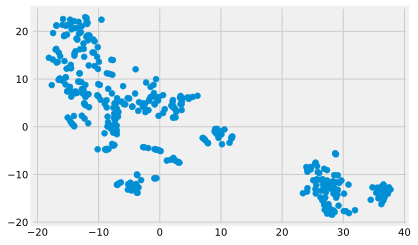

In [639]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])

Разобъем данные на 2 кластера

In [507]:
from sklearn.cluster import KMeans

In [508]:
kmeans = KMeans(n_clusters=2)

In [531]:
labels_train = kmeans.fit_predict(x_train_scaled)

In [510]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [511]:
label_test = kmeans.predict(x_test_scaled)

График TSNE с известными labels

Text(-25, -7, 'Кластер 1')

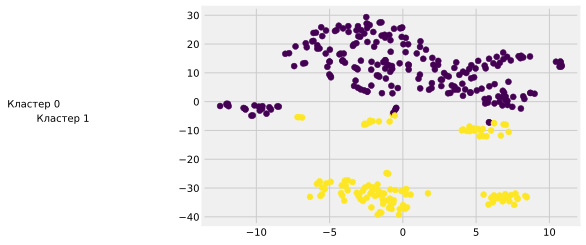

In [512]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:,1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(-25, -7, 'Кластер 1')


In [513]:
y_train.mean()

22.595762711864406

In [514]:
y_train[labels_train==0].mean()

25.94439655172414

In [515]:
y_train[labels_train==1].mean()

16.227868852459018

Text(0.5, 0, 'Цена')

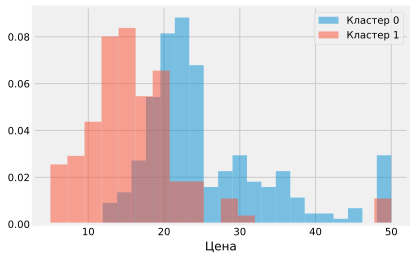

In [516]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [517]:
x_train.loc[labels_train==0, 'RM'].mean()

6.448517241379314

In [518]:
x_train.loc[labels_train==1, 'RM'].mean()

5.909286885245898

In [519]:
x_train.loc[labels_train==0, 'CRIM'].mean()

0.26798159482758627

In [520]:
x_train.loc[labels_train==1, 'CRIM'].mean()

9.05679418032787

Text(0.5, 0, 'CRIM')

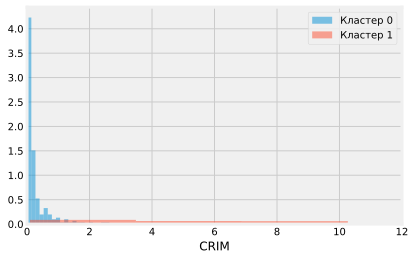

In [521]:
plt.hist(x_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1' ])
plt.xlabel('CRIM')

Text(0.5, 0, 'NOX nnitric oxides concentraion (parts per 1 million)')

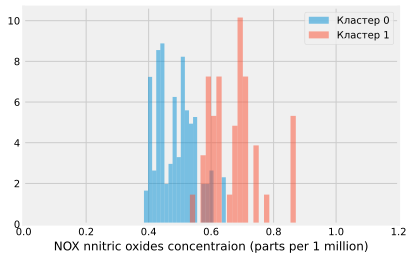

In [522]:
plt.hist(x_train.loc[labels_train==0, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1' ])
plt.xlabel('NOX nnitric oxides concentraion (parts per 1 million)')

Использование инфоормации, полученной с помощью t-sne в моделях

In [523]:
from sklearn.linear_model import LinearRegression

In [524]:
lr = LinearRegression()

In [525]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [526]:
y_test_pred = lr.predict(x_test_scaled)

In [527]:
from sklearn.metrics import r2_score

In [528]:
r2_score(y_test, y_test_pred)

0.6508417720329543

Две модели, построенные на обьектах из разных кластеров

In [533]:
# 1я модель на объектах из кластера 0
lr.fit(x_train_scaled.loc[labels_train==0, :],
       y_train[labels_train==0])

y_test_pred_0 = lr.predict(x_test_scaled.loc[label_test==0, :])

r2_score(y_test[label_test==0], y_test_pred_0)

0.8316034335298439

In [535]:
# 2я модель на объектах из кластера 1
lr.fit(x_train_scaled.loc[labels_train==1, :],
       y_train[labels_train==1])

y_test_pred_1 = lr.predict(x_test_scaled.loc[label_test==1, :])

r2_score(y_test[label_test==1], y_test_pred_1)

0.6458127429551191

In [ ]:
# объединение известных правильных ответов по объектам из двух кластеров

In [538]:
y_test_all = np.hstack([y_test[label_test==0],
                        y_test[label_test==1]])

In [539]:
# Обьединение предсказанных ответов по объектам из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [540]:
r2_score(y_test_all, y_test_pred_all)

0.8055877528812475